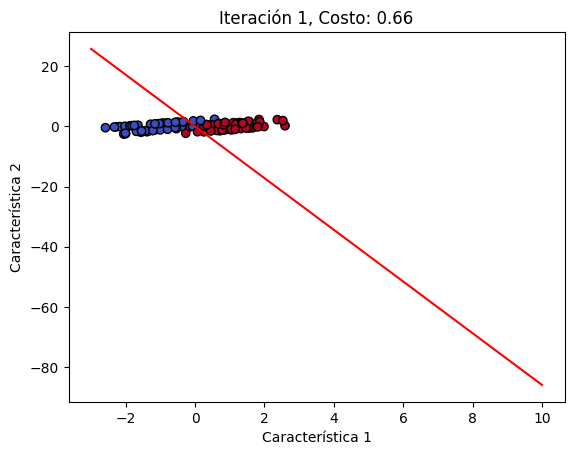

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_classification

# Generar datos de ejemplo
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X = np.c_[np.ones(X.shape[0]), X]  # Añadir columna de unos para el término de sesgo

# Función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Función de costo (entropía cruzada)
def cost_function(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    return -(1/m) * np.sum(y * np.log(h) + (1-y) * np.log(1-h))

# Descenso de gradiente
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    m = len(y)
    cost_history = []
    theta_history = []
    for _ in range(n_iterations):
        h = sigmoid(X @ theta)
        gradient = (1/m) * (X.T @ (h - y))
        theta -= learning_rate * gradient
        cost_history.append(cost_function(X, y, theta))
        theta_history.append(theta.copy())
    return theta, cost_history, theta_history

# Parámetros iniciales
theta = np.zeros(X.shape[1])
learning_rate = 0.1
n_iterations = 100

# Ejecutar descenso de gradiente
theta, cost_history, theta_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

# Crear animación
fig, ax = plt.subplots()
x_vals = np.linspace( -3, 10, 100)
y_vals = -(theta_history[0][0] + theta_history[0][1] * x_vals) / theta_history[0][2]
line, = ax.plot(x_vals, y_vals, color='red')
scatter = ax.scatter(X[:, 1], X[:, 2], c=y, cmap='coolwarm', edgecolors='k')

def update(frame):
    y_vals = -(theta_history[frame][0] + theta_history[frame][1] * x_vals) / theta_history[frame][2]
    line.set_ydata(y_vals)
    ax.set_title(f"Iteración {frame+1}, Costo: {cost_history[frame]:.2f}")
    return line,

ani = FuncAnimation(fig, update, frames=n_iterations, interval=100, blit=True)
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.show()

# Guardar el GIF
ani.save('optimizacion_regresion_logistica.gif', writer='pillow')

In [18]:
y_vals


array([-0.061689  , -0.06522002, -0.06875104, -0.07228206, -0.07581308,
       -0.0793441 , -0.08287512, -0.08640614, -0.08993716, -0.09346818,
       -0.0969992 , -0.10053022, -0.10406124, -0.10759226, -0.11112328,
       -0.1146543 , -0.11818532, -0.12171634, -0.12524736, -0.12877838,
       -0.1323094 , -0.13584042, -0.13937144, -0.14290246, -0.14643348,
       -0.1499645 , -0.15349552, -0.15702654, -0.16055756, -0.16408858,
       -0.1676196 , -0.17115062, -0.17468164, -0.17821266, -0.18174368,
       -0.1852747 , -0.18880572, -0.19233674, -0.19586776, -0.19939878,
       -0.2029298 , -0.20646082, -0.20999184, -0.21352286, -0.21705388,
       -0.2205849 , -0.22411592, -0.22764694, -0.23117796, -0.23470898,
       -0.23824   , -0.24177102, -0.24530204, -0.24883306, -0.25236408,
       -0.2558951 , -0.25942612, -0.26295714, -0.26648816, -0.27001918,
       -0.2735502 , -0.27708122, -0.28061224, -0.28414326, -0.28767428,
       -0.2912053 , -0.29473632, -0.29826734, -0.30179836, -0.30